In [1]:
!pip install labelme

  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 11.9 MB/s eta 0:00:00a 0:00:01
Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 4.7 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.23.2
    Uninstalling pydantic_core-2.23.2:
      Successfully uninstalled pydantic_core-2.23.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [labelme]0/11 [labelme]ime]


In [2]:
pip install pycocotools

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
import os
import numpy as np
import cv2

In [3]:
def generate_binary_masks(coco_json, image_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    coco = COCO(coco_json)

    for img_id in coco.imgs:
        img_info = coco.loadImgs(img_id)[0]
        height, width = img_info['height'], img_info['width']
        file_name = img_info['file_name']

        ann_ids = coco.getAnnIds(imgIds=img_id)
        anns = coco.loadAnns(ann_ids)

        # Start with all background
        mask = np.zeros((height, width), dtype=np.uint8)

        for ann in anns:
            rle = coco.annToRLE(ann)
            m = maskUtils.decode(rle)

            # Mark tooth region as 255 (white)
            mask[m == 1] = 255

        output_path = os.path.join(output_dir, file_name.replace('.jpg', '.png'))
        cv2.imwrite(output_path, mask)
        print(f"Saved mask: {output_path}")

In [13]:
generate_binary_masks(
    coco_json="/Users/adityamaharana/Downloads/dental.v4i.coco-segmentation/valid/_annotations.coco.json",
    image_dir="/Users/adityamaharana/Downloads/dental.v4i.coco-segmentation/valid/images",
    output_dir="/Users/adityamaharana/Downloads/dental.v4i.coco-segmentation/valid/masks"
)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Saved mask: /Users/adityamaharana/Downloads/dental.v4i.coco-segmentation/valid/masks/66_png.rf.910ca1f7cfbc93da4a613ca9d1eec44f.png
Saved mask: /Users/adityamaharana/Downloads/dental.v4i.coco-segmentation/valid/masks/116_png.rf.1953b6fd198fca298c9a8dc9e369127a.png
Saved mask: /Users/adityamaharana/Downloads/dental.v4i.coco-segmentation/valid/masks/61_png.rf.183224100ecbf04feec2054df7718515.png
Saved mask: /Users/adityamaharana/Downloads/dental.v4i.coco-segmentation/valid/masks/80_png.rf.04e0759577db823dde7dce8d14fd24dc.png
Saved mask: /Users/adityamaharana/Downloads/dental.v4i.coco-segmentation/valid/masks/44_png.rf.95f1d9ea7b3a49d62a13a95b777dace5.png
Saved mask: /Users/adityamaharana/Downloads/dental.v4i.coco-segmentation/valid/masks/55_png.rf.32254092f7636ee9d1f73630ebf5adcc.png
Saved mask: /Users/adityamaharana/Downloads/dental.v4i.coco-segmentation/valid/masks/28_png.rf.07b2bf44323c3bd4925ad35235aba

In [8]:
pip install numpy==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 2.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0
Note: you may need to restart the kernel to use updated packages.


In [9]:
!{sys.executable} -m pip install segmentation-models

  Using cached segmentation_models-1.0.1-py3-none-any.whl.metadata (938 bytes)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl.metadata (1.7 kB)
  Using cached image_classifiers-1.0.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached efficientnet-1.0.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached h5py-3.14.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.7 kB)
  Using cached scipy-1.16.0-cp311-cp311-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached numpy-2.3.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached segmentation_models-1.0.1-py3-none-any.whl (33 kB)
Using cached efficientnet-1.0.0-py3-none-any.whl (17 kB)
Using cached image_classifiers-1.0.0-py3-none-any.whl (19 kB)
Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
Using cached h5py-3.14.0-cp311-cp311-macosx_11_0_arm64.whl (2.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 7.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.9 MB/s e

In [4]:
np.__version__

'1.26.4'

In [15]:
!{sys.executable} -m pip install tensorflow

  Using cached tensorflow-2.19.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.74.0-cp311-cp311-macosx_11_0_universal2.whl.metadata (3.8 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached numpy-2.1.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-macosx_10_9_

In [18]:
!{sys.executable} -m pip install --upgrade segmentation-models
!{sys.executable} -m pip install --upgrade tensorflow

In [20]:
pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 2.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.16.0 requires numpy<2.6,>=1.25.2, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [9]:
!{sys.executable} -m pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 25.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


In [14]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 23.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


# MODEL

In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K

def dice_loss(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def bce_dice_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    d_loss = dice_loss(y_true, y_pred)
    return bce + d_loss

def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def iou_score(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

In [5]:
from tensorflow.keras.optimizers.legacy import Adam
from segmentation_models import Unet

BACKBONE = "mobilenetv2"

# Define model
model = Unet(
    backbone_name = BACKBONE,         # 'mobilenetv2' for faster training
    input_shape = (256, 512, 3),        # height=256, width=512, channels=1
    classes=1,                        # binary segmentation: 1 class (tooth)
    activation='sigmoid',            # sigmoid for binary segmentation
    encoder_weights="imagenet"             # ImageNet weights Transfer Learning
)

# Compile model
model.compile(
    optimizer=Adam(1e-4),
    loss=bce_dice_loss,   # Binary Crossentropy + Dice loss
    metrics=[dice_coefficient, iou_score]
)

model.summary()

/Users/adityamaharana/VirtualEnvPython/lib/python3.11/site-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '
2025-08-12 20:06:34.484081: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-08-12 20:06:34.484245: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-08-12 20:06:34.484257: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-08-12 20:06:34.484493: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-12 20:06:34.484885: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 512, 3)]        0         []                            
                                                                                                  
 Conv1_pad (ZeroPadding2D)   (None, 257, 513, 3)          0         ['input_1[0][0]']             
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 256, 32)         864       ['Conv1_pad[0][0]']           
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 128, 256, 32)         128       ['Conv1[0][0]']               
 on)                                                                                          

 rmalization)                                                                                     
                                                                                                  
 block_3_expand_relu (ReLU)  (None, 64, 128, 144)         0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 65, 129, 144)         0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 32, 64, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_d

 seConv2D)                                                                                        
                                                                                                  
 block_6_depthwise_BN (Batc  (None, 16, 32, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 16, 32, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 16, 32, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
          

 block_9_project_BN (BatchN  (None, 16, 32, 64)           256       ['block_9_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_9_add (Add)           (None, 16, 32, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 16, 32, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 16, 32, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
          

 block_13_expand_BN (BatchN  (None, 16, 32, 576)          2304      ['block_13_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_13_expand_relu (ReLU  (None, 16, 32, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 17, 33, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 8, 16, 576)           5184      ['block_13_pad[0][0]']        
 iseConv2D

                                                                                                  
 block_16_depthwise (Depthw  (None, 8, 16, 960)           8640      ['block_16_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 8, 16, 960)           3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 8, 16, 960)           0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_

 decoder_stage2a_bn (BatchN  (None, 64, 128, 64)          256       ['decoder_stage2a_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 decoder_stage2a_relu (Acti  (None, 64, 128, 64)          0         ['decoder_stage2a_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 decoder_stage2b_conv (Conv  (None, 64, 128, 64)          36864     ['decoder_stage2a_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 decoder_stage2b_bn (BatchN  (None, 64, 128, 64)          256       ['decoder_stage2b_conv[0][0]']
 ormalizat

In [6]:
# Set seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Set paths
train_img_dir = '/Users/adityamaharana/Downloads/Dental_data_1/train/images'
train_mask_dir = '/Users/adityamaharana/Downloads/Dental_data_1/train/masks'
val_img_dir = '/Users/adityamaharana/Downloads/Dental_data_1/valid/images'
val_mask_dir = '/Users/adityamaharana/Downloads/Dental_data_1/valid/masks'
test_img_dir = '/Users/adityamaharana/Downloads/Dental_data_1/test/images'
test_mask_dir = '/Users/adityamaharana/Downloads/Dental_data_1/test/masks'

In [7]:
import cv2
def load_dataset(image_dir, mask_dir, target_size=(512, 256)):
    X, Y = [], []
    image_files = sorted(os.listdir(image_dir))
    mask_files = sorted(os.listdir(mask_dir))

    for img_name, mask_name in zip(image_files, mask_files):
        # Load RGB image
        img = cv2.imread(os.path.join(image_dir, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)

        # Load grayscale mask
        mask = cv2.imread(os.path.join(mask_dir, mask_name), cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, target_size)
        mask = (mask > 127).astype(np.float32)  # Assumes 0/255 masks

        X.append(img)
        Y.append(mask[..., np.newaxis])  # Add channel to mask

    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.float32)

In [8]:
preprocess_input = sm.get_preprocessing(BACKBONE)

In [9]:
# Load data
X_train, Y_train = load_dataset(train_img_dir, train_mask_dir)
X_val, Y_val = load_dataset(val_img_dir, val_mask_dir)
X_test, Y_test = load_dataset(test_img_dir, test_mask_dir)

# Apply preprocessing (normalize using ImageNet stats)
X_train_prep = preprocess_input(X_train)
X_val_prep = preprocess_input(X_val)
X_test_prep = preprocess_input(X_test)


In [33]:
pip install tensorflow-macos tensorflow-metal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_cb = ModelCheckpoint(
    "dental_unet.keras",
    save_best_only=True,
    monitor="val_loss",
    mode="min"
)


In [21]:
import sys
print(sys.executable)

/Users/adityamaharana/VirtualEnvPython/bin/python


In [22]:
pip install --upgrade pip setuptools wheel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.0
    Uninstalling setuptools-65.5.0:
      Successfully uninstalled setuptools-65.5.0
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install tensorflow-macos

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install tensorflow-metal

Note: you may need to restart the kernel to use updated packages.


In [27]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Running on:", tf.config.experimental.list_logical_devices())

TensorFlow version: 2.15.0
Num GPUs Available: 1
Running on: [LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [28]:
history = model.fit(
    X_train_prep, Y_train,
    validation_data=(X_val_prep, Y_val),
    epochs=15,             
    batch_size=6,
    callbacks=[checkpoint_cb]
)


Epoch 1/15


2025-07-27 09:57:29.535322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - ETA: 0s - loss: 0.9836 - dice_coefficient: 0.4466 - iou_score: 0.2915

/Users/adityamaharana/VirtualEnvPython/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 55s 1s/step - loss: 0.9836 - dice_coefficient: 0.4466 - iou_score: 0.2915 - val_loss: 2.3188 - val_dice_coefficient: 0.3757 - val_iou_score: 0.2317
Epoch 2/15
38/38 [==============================] - 32s 832ms/step - loss: 0.6533 - dice_coefficient: 0.6132 - iou_score: 0.4434 - val_loss: 1.3895 - val_dice_coefficient: 0.5057 - val_iou_score: 0.3391
Epoch 3/15
38/38 [==============================] - 32s 847ms/step - loss: 0.5142 - dice_coefficient: 0.6882 - iou_score: 0.5257 - val_loss: 0.8245 - val_dice_coefficient: 0.6113 - val_iou_score: 0.4409
Epoch 4/15
38/38 [==============================] - 33s 875ms/step - loss: 0.4214 - dice_coefficient: 0.7418 - iou_score: 0.5901 - val_loss: 0.5052 - val_dice_coefficient: 0.7033 - val_iou_score: 0.5432
Epoch 5/15
38/38 [==============================] - 34s 887ms/step - loss: 0.3520 - dice_coefficient: 0.7828 - iou_score: 0.6435 - val_loss: 0.4557 - val_dice_coefficient: 0.7170 - val_iou_score: 0.5597

In [30]:
history = model.fit(
    X_train_prep, Y_train,
    validation_data=(X_val_prep, Y_val),
    epochs=10,             
    batch_size=6,
    callbacks=[checkpoint_cb]
)


Epoch 1/10
38/38 [==============================] - 34s 887ms/step - loss: 0.1426 - dice_coefficient: 0.9152 - iou_score: 0.8436 - val_loss: 0.3470 - val_dice_coefficient: 0.8084 - val_iou_score: 0.6789
Epoch 2/10
38/38 [==============================] - 32s 830ms/step - loss: 0.1379 - dice_coefficient: 0.9182 - iou_score: 0.8489 - val_loss: 0.3217 - val_dice_coefficient: 0.8243 - val_iou_score: 0.7014
Epoch 3/10
38/38 [==============================] - 31s 818ms/step - loss: 0.1325 - dice_coefficient: 0.9217 - iou_score: 0.8548 - val_loss: 0.3326 - val_dice_coefficient: 0.8211 - val_iou_score: 0.6969
Epoch 4/10
38/38 [==============================] - 31s 798ms/step - loss: 0.1268 - dice_coefficient: 0.9252 - iou_score: 0.8609 - val_loss: 0.3359 - val_dice_coefficient: 0.8193 - val_iou_score: 0.6944
Epoch 5/10
38/38 [==============================] - 31s 808ms/step - loss: 0.1211 - dice_coefficient: 0.9287 - iou_score: 0.8669 - val_loss: 0.3083 - val_dice_coefficient: 0.8374 - val_iou

1/1 [==============================] - 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


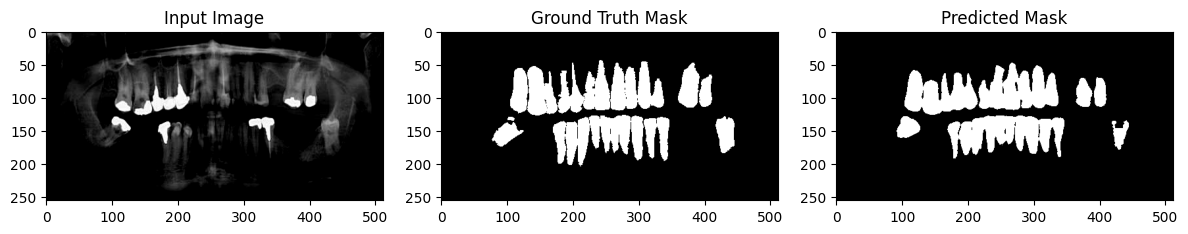

1/1 [==============================] - 0s 72ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


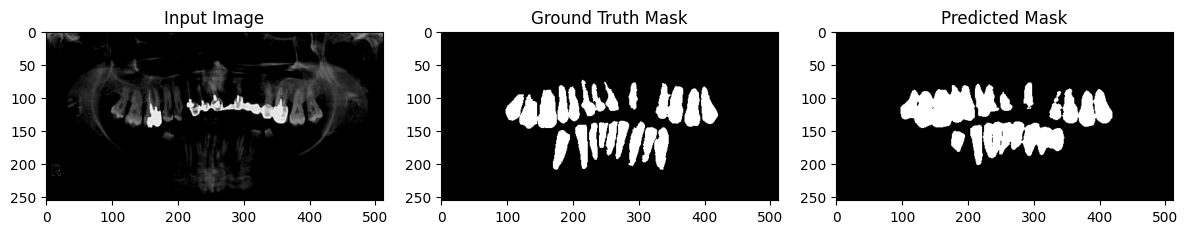

1/1 [==============================] - 0s 55ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


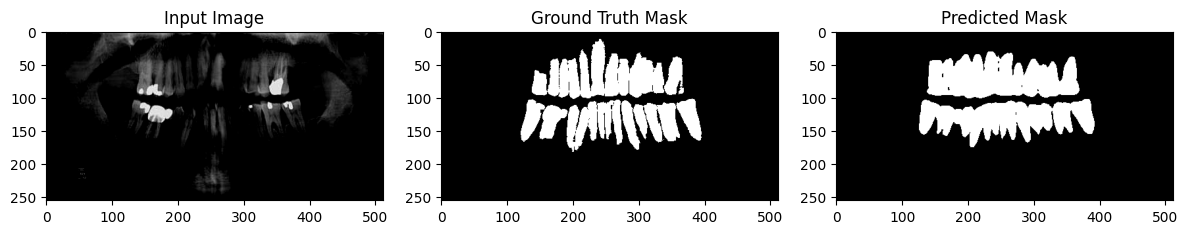

In [31]:
import matplotlib.pyplot as plt

def visualize_prediction(idx):
    image = X_test_prep[idx]
    ground_truth = Y_test[idx].squeeze()
    prediction = model.predict(np.expand_dims(image, axis=0))[0].squeeze()
    prediction_bin = (prediction > 0.5).astype(np.uint8)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(image.squeeze(), cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.title("Ground Truth Mask")
    plt.imshow(ground_truth, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(prediction_bin, cmap='gray')

    plt.tight_layout()
    plt.show()

# Visualize 3 sample predictions
for i in range(3):
    visualize_prediction(i)


In [6]:
from graphviz import Digraph

# Create the pipeline flowchart
dot = Digraph(comment='Dental Segmentation Pipeline', format='png')
dot.attr(rankdir='LR', size='40')

# Nodes
dot.node('A', 'Data Acquisition\n(Doctors + Open-source)')
dot.node('B', 'Annotation\n(Roboflow + Domain Expertise)')
dot.node('C', 'Preprocessing\n- Resize to 512×256\n- Convert to 3 channels\n- Normalize\n- Augmentation')
dot.node('D', 'Model Selection\nU-Net (MobileNetV2 encoder)\nfrom segmentation_models')
dot.node('E', 'Transfer Learning\n(ImageNet Weights)')
dot.node('F', 'Compilation\nAdam Optimizer\nBCE + Dice Loss')
dot.node('G', 'Training\n25 Epochs, Batch=6\nTensorFlow-Metal GPU Acceleration')
dot.node('H', 'Evaluation\nIoU, Dice Score\nTest Set')
dot.node('I', 'Output\nPredicted Tooth Masks')

# Edges
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI'])

# Render the flowchart
output_path = '/Users/adityamaharana/Downloads/Dental_data_1/dental_segmentation_pipeline'
dot.render(output_path, cleanup=True)

output_path + '.png'

'/Users/adityamaharana/Downloads/Dental_data_1/dental_segmentation_pipeline.png'

In [3]:
pip install graphviz


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /Users/adityamaharana/VirtualEnvPython/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
from graphviz import Digraph

# Create a Digraph object
dot = Digraph(comment="Dental Segmentation Pipeline", format="png")

# Node styles
dot.attr('node', shape='box', style='filled', fontname="Helvetica", fontsize="30")

# Colors for stages
colors = {
    "input": "#AED6F1",       # Light Blue
    "preprocess": "#ABEBC6",  # Light Green
    "model": "#F9E79F",       # Light Yellow
    "train": "#F5B7B1",       # Light Pink
    "eval": "#D7BDE2"         # Light Purple
}

# Level 1 (3 nodes)
dot.node("Data Collection", "Data Collection\n(Doctors + Open Source)", fillcolor=colors["input"])
dot.node("Annotation", "Annotation\n(Roboflow + Experts)", fillcolor=colors["input"])
dot.node("Split", "Train (74%) / Val (12%) / Test (14%)", fillcolor=colors["input"])
dot.edges([("Data Collection", "Annotation"), ("Annotation", "Split")])

# Level 2 (3 nodes)
dot.node("Preprocess", "Preprocessing\n(Resize, Normalize,\nConvert to 3-channels)", fillcolor=colors["preprocess"])
dot.node("Augment", "Data Augmentation\n(Optional)", fillcolor=colors["preprocess"])
dot.node("Prep", "Prepare Tensors\n+ Preprocessing Function", fillcolor=colors["preprocess"])
dot.edges([("Split", "Preprocess"), ("Preprocess", "Augment"), ("Augment", "Prep")])

# Level 3 (3 nodes)
dot.node("Model", "U-Net (MobileNetV2 Encoder)\nSegmentation Models Lib", fillcolor=colors["model"])
dot.node("Transfer", "Transfer Learning\n(Encoder Weights)", fillcolor=colors["model"])
dot.node("Compile", "Compile Model\n(Adam, BCE+Dice Loss)", fillcolor=colors["model"])
dot.edges([("Prep", "Model"), ("Model", "Transfer"), ("Transfer", "Compile")])

# Level 4 (3 nodes)
dot.node("Train", "Train Model\n(Batch Size, Epochs)", fillcolor=colors["train"])
dot.node("Save", "Save Model\n(.h5/.keras)", fillcolor=colors["train"])
dot.node("Evaluate", "Evaluate on Test Set\n(IoU, Dice Score)", fillcolor=colors["eval"])
dot.edges([("Compile", "Train"), ("Train", "Save"), ("Save", "Evaluate")])

# Render
dot.render('/Users/adityamaharana/Downloads/Dental_data_1/dental_segmentation_pipeline', cleanup=True)


'/Users/adityamaharana/Downloads/Dental_data_1/dental_segmentation_pipeline.png'

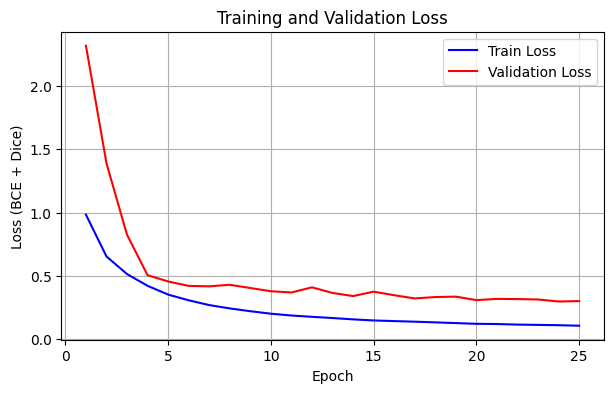

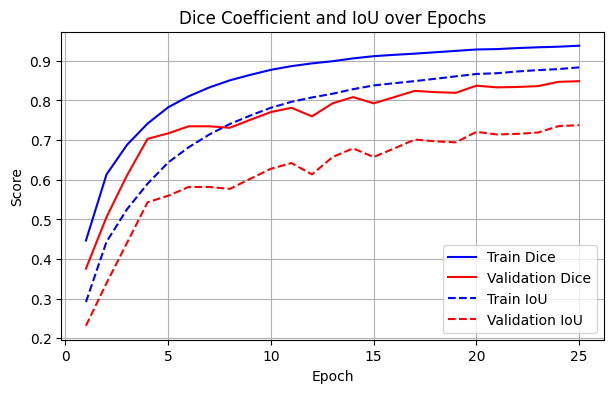

In [12]:
import matplotlib.pyplot as plt

# Combined loss from Train 1 and Train 2 (train_loss + val_loss)
train1_loss = [0.9836, 0.6533, 0.5142, 0.4214, 0.3520, 0.3068, 0.2691, 0.2428, 0.2206, 0.2010, 0.1867, 0.1763, 0.1667, 0.1562, 0.1476]
val1_loss   = [2.3188, 1.3895, 0.8245, 0.5052, 0.4557, 0.4207, 0.4172, 0.4296, 0.4040, 0.3786, 0.3688, 0.4094, 0.3650, 0.3404, 0.3751]

train2_loss = [0.1426, 0.1379, 0.1325, 0.1268, 0.1211, 0.1193, 0.1148, 0.1125, 0.1101, 0.1060]
val2_loss   = [0.3470, 0.3217, 0.3326, 0.3359, 0.3083, 0.3181, 0.3166, 0.3133, 0.2974, 0.3010]

# Concatenate losses
train_loss = train1_loss + train2_loss
val_loss   = val1_loss + val2_loss

# Dice and IoU from previous message (concatenated for 25 epochs)
train_dice = [0.4466, 0.6132, 0.6882, 0.7418, 0.7828, 0.8106, 0.8329, 0.8508, 0.8647, 0.8774, 0.8867, 0.8936, 0.8991, 0.9062, 0.9118,
              0.9152, 0.9182, 0.9217, 0.9252, 0.9287, 0.9297, 0.9323, 0.9342, 0.9358, 0.9382]
val_dice   = [0.3757, 0.5057, 0.6113, 0.7033, 0.7170, 0.7349, 0.7349, 0.7311, 0.7513, 0.7708, 0.7816, 0.7600, 0.7928, 0.8086, 0.7929,
              0.8084, 0.8243, 0.8211, 0.8193, 0.8374, 0.8331, 0.8341, 0.8363, 0.8471, 0.8487]

train_iou = [0.2915, 0.4434, 0.5257, 0.5901, 0.6435, 0.6820, 0.7141, 0.7406, 0.7620, 0.7817, 0.7966, 0.8077, 0.8170, 0.8286, 0.8379,
             0.8436, 0.8489, 0.8548, 0.8609, 0.8669, 0.8688, 0.8733, 0.8766, 0.8793, 0.8836]
val_iou   = [0.2317, 0.3391, 0.4409, 0.5432, 0.5597, 0.5818, 0.5818, 0.5770, 0.6025, 0.6277, 0.6421, 0.6135, 0.6572, 0.6792, 0.6574,
             0.6789, 0.7014, 0.6969, 0.6944, 0.7208, 0.7143, 0.7158, 0.7192, 0.7353, 0.7378]

epochs = list(range(1, len(train_loss) + 1))

# Plot and save loss curve
plt.figure(figsize=(7,4))
plt.plot(epochs, train_loss, 'b-', label='Train Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (BCE + Dice)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_curve.png')  # Save as PNG
plt.show()
plt.close()  # Close figure to free memory

# Plot and save metrics curve
plt.figure(figsize=(7,4))
plt.plot(epochs, train_dice, 'b-', label='Train Dice')
plt.plot(epochs, val_dice, 'r-', label='Validation Dice')
plt.plot(epochs, train_iou, 'b--', label='Train IoU')
plt.plot(epochs, val_iou, 'r--', label='Validation IoU')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Dice Coefficient and IoU over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('metrics_curve.png')  # Save as PNG
plt.show()
plt.close()

In [10]:
model_path = "dental_unet.keras"

In [11]:
from tensorflow.keras.models import load_model

model = load_model(model_path, custom_objects={
            'bce_dice_loss': bce_dice_loss,
            'dice_coefficient': dice_coefficient,
            'iou_score': iou_score
    })

In [40]:
def dice_np(y_true, y_pred, smooth=1e-6):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)

def iou_np(y_true, y_pred, smooth=1e-6):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    union = np.sum(y_true_f) + np.sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

In [12]:
image_paths = sorted([os.path.join(test_img_dir, f) for f in os.listdir(test_img_dir) if f.endswith(".jpg")])
mask_paths = sorted([os.path.join(test_mask_dir, f) for f in os.listdir(test_mask_dir) if f.endswith(".png")])

In [15]:
X_test, Y_test
X_test_prep

y_pred_probs = model.predict(X_test_prep)  # Probabilities from sigmoid
y_pred_bin = (y_pred_probs > 0.5).astype(np.float32)  # Converted to binary with threshold 0.5

2025-08-12 20:31:05.105239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


In [21]:
# Lists to store metrics
results = []

for idx, (yt, yp) in enumerate(zip(Y_test, y_pred_bin), start=1):
    dice = round(dice_coefficient(yt, yp).numpy(), 4)
    iou = round(iou_score(yt, yp).numpy(), 4)
    results.append({"Image": idx, "Dice Coefficient": dice, "IoU Score": iou})

In [22]:
import pandas as pd

# Create DataFrame
df = pd.DataFrame(results)

# Add mean row
df.loc["Mean"] = ["Mean", df["Dice Coefficient"].mean(), df["IoU Score"].mean()]

# Plot table as PNG
fig, ax = plt.subplots(figsize=(6, len(df) * 0.4))
ax.axis('off')
table = ax.table(
    cellText=df.round(4).values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Save PNG
plt.savefig("test_results_table.png", dpi=300, bbox_inches='tight')
plt.close()

print("Saved results table as test_results_table.png")

Saved results table as test_results_table.png


In [46]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 401.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /Users/adityamaharana/VirtualEnvPython/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
